In [2]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
from matplotlib import pyplot as plt
import torch.nn.functional as F


C:\Users\vrinda\anaconda3\envs\vrinda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\vrinda\anaconda3\envs\vrinda\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [43]:
from region_proposal_network import RegionProposalNetwork

In [44]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device,torch.cuda.get_device_name(0))
else:
    device =torch.device("cpu")
    print(device)

cpu


In [45]:
import glob
import cv2
num_images =50
image_names = glob.glob(r"C:\Users\vrinda\Desktop\2ndsem\Summer_internship\data\Training\input\*.jpg")
image_names.sort()
imset = image_names[0:num_images]
# images = [cv2.imread(image,1) for image in image_names]
imset
img = [cv2.imread(imgs, 0) for imgs in imset]
img_dataset = np.array(img)

In [46]:
img_dataset.shape

(50, 512, 512)

In [10]:
num_grd = 50
ground_truth = glob.glob(r"C:\Users\vrinda\Desktop\2ndsem\Summer_internship\data\Training\Output\*.png")
ground_truth.sort()
grdset = ground_truth[0:num_grd]
masks = [cv2.imread(mask, 0) for mask in grdset]
mask_dataset = np.array(masks)

In [11]:
mask_dataset.shape

(50, 512, 512)

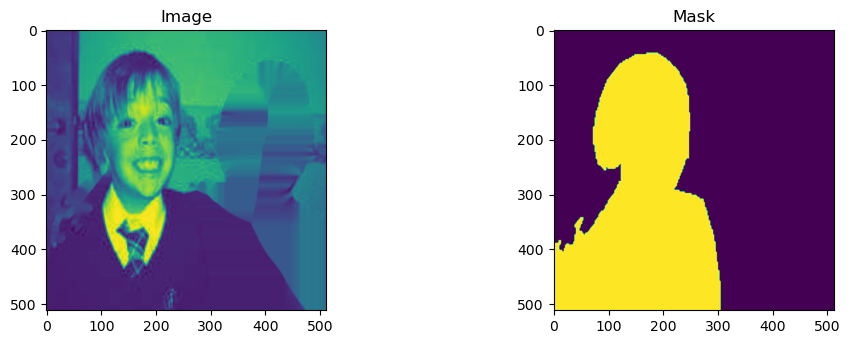

In [12]:
import random
img_number = random.randint(0, len(img_dataset)-1)
img = img_dataset[img_number]
mask = mask_dataset[img_number]
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Mask')
plt.imshow(mask)
plt.show()

In [13]:
print(img_dataset)

[[[ 89  75  58 ... 138 139 140]
  [ 90  79  66 ... 138 139 140]
  [ 87  78  69 ... 138 139 140]
  ...
  [146 145 144 ...  59  58  57]
  [136 136 135 ...  59  58  58]
  [135 134 133 ...  57  57  56]]

 [[173 174 122 ... 129 126 115]
  [164 177 142 ... 129 126 116]
  [162 180 165 ... 128 125 117]
  ...
  [ 42  43  45 ... 117 123 127]
  [ 39  41  42 ... 123 135 141]
  [ 38  40  42 ... 130 147 153]]

 [[253 252 250 ...  57  68  83]
  [253 252 251 ...  69  84  98]
  [252 252 253 ...  66  71  74]
  ...
  [126 140 149 ... 182 172 198]
  [171 136 157 ... 154 151 179]
  [138 137 172 ... 154 145 178]]

 ...

 [[215 214 212 ...  53  46  46]
  [207 207 206 ...  70  50  32]
  [211 211 210 ...  70  44  17]
  ...
  [149 147 148 ... 220 232 238]
  [120 128 136 ... 221 223 216]
  [123 130 136 ... 192 194 196]]

 [[104 104 105 ... 102 102 102]
  [104 104 105 ... 102 102 102]
  [104 105 106 ... 102 102 102]
  ...
  [ 46  46  45 ...  28  23  23]
  [ 47  46  45 ...  27  23  22]
  [ 47  46  45 ...  27  23  

In [14]:
train_dataset, test_dataset = random_split(img_dataset, [0.75, 0.25])
batch_size = 8

train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # No need to shuffle test data


In [15]:
# Assuming you have created train_dataloader
for batch_images in train_dataloader:
    # batch_images is a tensor containing the images in the batch
    print(batch_images)
    # Access the batch size
    batch_size = batch_images.size(0)
    
    # Process the batch as needed
    # Example: Print the shape of the batch images
    print(f"Batch Size: {batch_size}")
    print(f"Batch Images Shape: {batch_images.shape}")
    break

tensor([[[252, 252, 253,  ..., 253, 254, 253],
         [255, 254, 253,  ..., 253, 253, 250],
         [233, 232, 231,  ..., 255, 254, 250],
         ...,
         [ 83,  91,  92,  ...,  35,  39,  41],
         [ 89,  95,  93,  ...,  35,  35,  35],
         [ 93,  98,  95,  ...,  36,  35,  33]],

        [[253, 253, 253,  ..., 163, 163, 163],
         [253, 253, 253,  ..., 163, 163, 163],
         [253, 253, 253,  ..., 163, 163, 163],
         ...,
         [ 23,  24,  27,  ..., 109, 113, 108],
         [ 25,  26,  28,  ..., 112, 113, 106],
         [ 28,  28,  29,  ..., 115, 112, 104]],

        [[182, 185, 196,  ...,  12,  13,  14],
         [182, 185, 195,  ...,  12,  13,  13],
         [182, 183, 193,  ...,  13,  13,  13],
         ...,
         [ 72,  73,  73,  ...,  69,  71,  69],
         [ 72,  73,  73,  ...,  69,  72,  68],
         [ 72,  73,  73,  ...,  69,  72,  68]],

        ...,

        [[ 38,  38,  38,  ...,  40,  40,  40],
         [ 38,  38,  38,  ...,  43,  42,  42]

## face detection

In [16]:
#it contains a backbone architecture and bilinear network
#backbone architecture
# class InceptionModule(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(InceptionModule, self).__init__()
#         self.conv1x1 = nn.Conv2d(in_channels, out_channels, kernel_size=1)
#         self.conv3x3_reduce = nn.Conv2d(in_channels, out_channels // 2, kernel_size=1)
#         self.conv3x3 = nn.Conv2d(out_channels // 2, out_channels, kernel_size=3, padding=1)
#         self.conv5x5_reduce = nn.Conv2d(in_channels, out_channels // 4, kernel_size=1)
#         self.conv5x5 = nn.Conv2d(out_channels // 4, out_channels, kernel_size=5, padding=2)

#     def forward(self, x):
#         conv1x1 = self.conv1x1(x)
#         conv3x3 = self.conv3x3(self.conv3x3_reduce(x))
#         conv5x5 = self.conv5x5(self.conv5x5_reduce(x))
#         return torch.cat([conv1x1, conv3x3, conv5x5], dim=1)
class BackboneNetwork(nn.Module):
    def __init__(self):
        super(BackboneNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3,16, kernel_size=5, padding=2, stride=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16,24, kernel_size=3, padding=1, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(24,48, kernel_size=3, padding=1, stride=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv6 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x) 
        x = self.pool1(x)

        x = self.conv2(x)
        x = torch.relu(x)  
        x = self.pool2(x)

        x = self.conv3(x)
        x = torch.relu(x)  
        x = self.pool3(x)

        x = self.conv4(x)
        x = torch.relu(x)  
        x = self.pool4(x)

        x = self.conv5(x)
        x = torch.relu(x)  
        x = self.pool5(x)

        x = self.conv6(x)
        x = torch.relu(x)  

        return x

        
        
        
        
        
        

In [17]:
nettt =  BackboneNetwork()
nettt

BackboneNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv6): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [74]:
class BackboneNetwork(nn.Module):
    def __init__(self):
        super(BackboneNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3,16, kernel_size=5, padding=2, stride=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16,24, kernel_size=3, padding=1, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(24,48, kernel_size=3, padding=1, stride=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv6 = nn.Conv2d(48,48, kernel_size=3, padding=1, stride=1)

    def forward(self, x):
        x = self.conv1(x)
        print("After conv1:", x.shape)
        x = torch.relu(x)
        x = self.pool1(x)
        print("After pool1:", x.shape)

        x = self.conv2(x)
        print("After conv2:", x.shape)
        x = torch.relu(x)
        x = self.pool2(x)
        print("After pool2:", x.shape)

        x = self.conv3(x)
        print("After conv3:", x.shape)
        x = torch.relu(x)
        x = self.pool3(x)
        print("After pool3:", x.shape)

        x = self.conv4(x)
        print("After conv4:", x.shape)
        x = torch.relu(x)
        x = self.pool4(x)
        print("After pool4:", x.shape)

        x = self.conv5(x)
        print("After conv5:", x.shape)
        x = torch.relu(x)
        x = self.pool5(x)
        print("After pool5:", x.shape)

        x = self.conv6(x)
        print("After conv6:", x.shape)
        x = torch.relu(x)

        return x

def _enumerate_shifted_anchor(anchor_base, feat_stride, height, width):
    # Enumerate all shifted anchors:
    #
    # add A anchors (1, A, 4) to
    # cell K shifts (K, 1, 4) to get
    # shift anchors (K, A, 4)
    # reshape to (K*A, 4) shifted anchors
    # return (K*A, 4)

    # !TODO: add support for torch.CudaTensor
    # xp = cuda.get_array_module(anchor_base)
    # it seems that it can't be boosed using GPU
    import numpy as xp
    shift_y = xp.arange(0, height * feat_stride, feat_stride)
    shift_x = xp.arange(0, width * feat_stride, feat_stride)
    shift_x, shift_y = xp.meshgrid(shift_x, shift_y)
    shift = xp.stack((shift_y.ravel(), shift_x.ravel(),
                      shift_y.ravel(), shift_x.ravel()), axis=1)

    A = anchor_base.shape[0]
    K = shift.shape[0]
    anchor = anchor_base.reshape((1, A, 4)) + \
             shift.reshape((1, K, 4)).transpose((1, 0, 2))
    anchor = anchor.reshape((K * A, 4)).astype(np.float32)
    return anchor


def _enumerate_shifted_anchor_torch(anchor_base, feat_stride, height, width):
    # Enumerate all shifted anchors:
    #
    # add A anchors (1, A, 4) to
    # cell K shifts (K, 1, 4) to get
    # shift anchors (K, A, 4)
    # reshape to (K*A, 4) shifted anchors
    # return (K*A, 4)

    # !TODO: add support for torch.CudaTensor
    # xp = cuda.get_array_module(anchor_base)
    import torch as t
    shift_y = t.arange(0, height * feat_stride, feat_stride)
    shift_x = t.arange(0, width * feat_stride, feat_stride)
    shift_x, shift_y = xp.meshgrid(shift_x, shift_y)
    shift = xp.stack((shift_y.ravel(), shift_x.ravel(),
                      shift_y.ravel(), shift_x.ravel()), axis=1)

    A = anchor_base.shape[0]
    K = shift.shape[0]
    anchor = anchor_base.reshape((1, A, 4)) + \
             shift.reshape((1, K, 4)).transpose((1, 0, 2))
    anchor = anchor.reshape((K * A, 4)).astype(np.float32)
    return anchor


def normal_init(m, mean, stddev, truncated=False):
    """
    weight initalizer: truncated normal and random normal.
    """
    # x is a parameter
    if truncated:
        m.weight.data.normal_().fmod_(2).mul_(stddev).add_(mean)  # not a perfect approximation
    else:
        m.weight.data.normal_(mean, stddev)
        m.bias.data.zero_()



class RegionProposalNetwork(nn.Module):
    def __init__(
            self, in_channels=48, mid_channels=512, ratios=[0.5, 1, 2],
            anchor_scales=[12, 24,48,96,144,192,288,384 ], feat_stride=16,
            proposal_creator_params=dict(),
    ):
        super(RegionProposalNetwork, self).__init__()
        self.anchor_base = generate_anchor_base(
            anchor_scales=anchor_scales, ratios=ratios)
        self.feat_stride = feat_stride
        self.proposal_layer = ProposalCreator(self, **proposal_creator_params)
        n_anchor = self.anchor_base.shape[0]
        self.conv1 = nn.Conv2d(in_channels, mid_channels, 3, 1, 1)
        self.score = nn.Conv2d(mid_channels, n_anchor * 2, 1, 1, 0)
        self.loc = nn.Conv2d(mid_channels, n_anchor * 4, 1, 1, 0)
        normal_init(self.conv1, 0, 0.01)
        normal_init(self.score, 0, 0.01)
        normal_init(self.loc, 0, 0.01)

    def forward(self, x, img_size, scale=1.):
        n, _, hh, ww = x.shape
        anchor = _enumerate_shifted_anchor(
            np.array(self.anchor_base),
            self.feat_stride, hh, ww)

        n_anchor = anchor.shape[0] // (hh * ww)
        h = F.relu(self.conv1(x))

        rpn_locs = self.loc(h)
        rpn_locs = rpn_locs.permute(0, 2, 3, 1).contiguous().view(n, -1, 4)
        rpn_scores = self.score(h)
        rpn_scores = rpn_scores.permute(0, 2, 3, 1).contiguous()
        rpn_softmax_scores = F.softmax(rpn_scores.view(n, hh, ww, n_anchor, 2), dim=4)
        rpn_fg_scores = rpn_softmax_scores[:, :, :, :, 1].contiguous()
        rpn_fg_scores = rpn_fg_scores.view(n, -1)
        rpn_scores = rpn_scores.view(n, -1, 2)

        rois = list()
        roi_indices = list()
        for i in range(n):
            roi = self.proposal_layer(
                rpn_locs[i].cpu().data.numpy(),
                rpn_fg_scores[i].cpu().data.numpy(),
                anchor, img_size,
                scale=scale)
            batch_index = i * np.ones((len(roi),), dtype=np.int32)
            rois.append(roi)
            roi_indices.append(batch_index)

        rois = np.concatenate(rois, axis=0)
        roi_indices = np.concatenate(roi_indices, axis=0)
        return rpn_locs, rpn_scores, rois, roi_indices, anchor   


In [75]:
# from PIL import Image
# image_path = r"C:\Users\vrinda\Desktop\2ndsem\Summer_internship\dataset\train\input\0_0000010.jpg"
# image = Image.open(image_path)
# image
# # Define preprocessing transformations
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize the image to match your network's input size
#     transforms.ToTensor(),           # Convert the PIL image to a PyTorch tensor
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
# ])
# input_data = preprocess(image).unsqueeze(0)

In [76]:
# Create an instance of the BackboneNetwork
backbone = BackboneNetwork()

# Create an instance of the RegionProposalNetwork
rpn = RegionProposalNetwork()

# Example input data with shape (batch_size, channels, height, width)
input_data = torch.randn(1, 3, 256, 256)

# Process input data using the BackboneNetwork
backbone_output = backbone(input_data)

# Process the backbone output using the RegionProposalNetwork
rpn_locs, rpn_scores, rois, roi_indices, anchor = rpn(backbone_output, img_size=(256, 256))


After conv1: torch.Size([1, 16, 128, 128])
After pool1: torch.Size([1, 16, 64, 64])
After conv2: torch.Size([1, 24, 64, 64])
After pool2: torch.Size([1, 24, 32, 32])
After conv3: torch.Size([1, 48, 32, 32])
After pool3: torch.Size([1, 48, 16, 16])
After conv4: torch.Size([1, 48, 16, 16])
After pool4: torch.Size([1, 48, 8, 8])
After conv5: torch.Size([1, 48, 8, 8])
After pool5: torch.Size([1, 48, 4, 4])
After conv6: torch.Size([1, 48, 4, 4])


AssertionError: Torch not compiled with CUDA enabled

In [77]:
print("Final output shape:", output.shape)

Final output shape: torch.Size([1, 48, 4, 4])
